In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.core.display import HTML
css = open('../dataframe-styles/style-notebook.css').read() + open('../dataframe-styles/style-table.css').read()
HTML('<style>{}</style>.'.format(css))

In [120]:
# load the sample data into DataFrame
s14 = pd.DataFrame.from_csv('epl-14-15.csv', index_col=None, encoding='utf-8')
s13 = pd.DataFrame.from_csv('epl-13-14.csv', index_col=None, encoding='utf-8')
s12 = pd.DataFrame.from_csv('epl-12-13.csv', index_col=None, encoding='utf-8')

# create the epl standings and short form name
r14 = {'Chelsea':1, 'Man City':2, 'Arsenal':3, 'Man United':4, 'Tottenham':5, 'Liverpool':6, 'Southampton':7, 'Swansea':8, 'Stoke':9, 'Crystal Palace':10, 'Everton':11, 'West Ham':12, 'West Brom':13, 'Leicester':14, 'Newcastle':15, 'Sunderland':16, 'Aston Villa':17, 'Hull':18, 'Burnley':19, 'QPR':20}
r13 = {'Man City':1, 'Liverpool':2, 'Chelsea':3, 'Arsenal':4, 'Everton':5, 'Tottenham':6, 'Man United':7, 'Southampton':8, 'Stoke':9, 'Newcastle':10, 'Crystal Palace':11, 'Swansea':12, 'West Ham':13, 'Sunderland':14, 'Aston Villa':15, 'Hull':16, 'West Brom':17, 'Norwich':18, 'Fulham':19, 'Cardiff':20}
r12 = {'Man United':1, 'Man City':2, 'Chelsea':3, 'Arsenal':4, 'Tottenham':5, 'Everton':6, 'Liverpool':7, 'West Brom':8, 'Swansea':9, 'West Ham':10, 'Norwich':11, 'Fulham':12, 'Stoke':13, 'Southampton':14, 'Aston Villa':15, 'Newcastle':16, 'Sunderland':17, 'Wigan':18, 'Reading':19, 'QPR':20}
sfn = {1:'CHE', 2:'MNC', 3:'ARS', 4:'MNU', 5:'TOT', 6:'LIV', 7:'SOT', 8:'SWA', 9:'STO', 10:'CRY', 11:'EVE', 12:'WHU', 13:'WBA', 14:'LEI', 15:'NEW', 16:'SUN', 17:'AST', 18:'HUL', 19:'BUR', 20:'QPR'}

# assign the appropriate season and ranking to the dataframe
for i in s14.index:
    s14.loc[i, 'Season'] = "2015"
    s14.loc[i, 'HomeRank'] = r14[s14.loc[i].HomeTeam]
    s14.loc[i, 'AwayRank'] = r14[s14.loc[i].AwayTeam]

for i in s13.index:
    s13.loc[i, 'Season'] = "2014"
    s13.loc[i, 'HomeRank'] = r13[s13.loc[i].HomeTeam]
    s13.loc[i, 'AwayRank'] = r13[s13.loc[i].AwayTeam]
    
for i in s12.index:
    s12.loc[i, 'Season'] = "2013"
    s12.loc[i, 'HomeRank'] = r12[s12.loc[i].HomeTeam]
    s12.loc[i, 'AwayRank'] = r12[s12.loc[i].AwayTeam]

# concat all the seasons into one DataFrame
warehouse = pd.concat([s14, s13, s12]).reset_index()
epl = warehouse[['Date', 'Season', 'HomeTeam', 'HomeRank', 'AwayTeam', 'AwayRank', 'Referee', 'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC']]

epl.head()

,Date,Season,HomeTeam,HomeRank,AwayTeam,AwayRank,Referee,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC
0,16/08/14,2015,Arsenal,3,Crystal Palace,10,J Moss,2,1,14,4,6,2,13,19,9,3
1,16/08/14,2015,Leicester,14,Everton,11,M Jones,2,2,11,13,3,3,16,10,3,6
2,16/08/14,2015,Man United,4,Swansea,8,M Dean,1,2,14,5,5,4,14,20,4,0
3,16/08/14,2015,QPR,20,Hull,18,C Pawson,0,1,19,11,6,4,10,10,8,9
4,16/08/14,2015,Stoke,9,Aston Villa,17,A Taylor,0,1,12,7,2,2,14,9,2,8


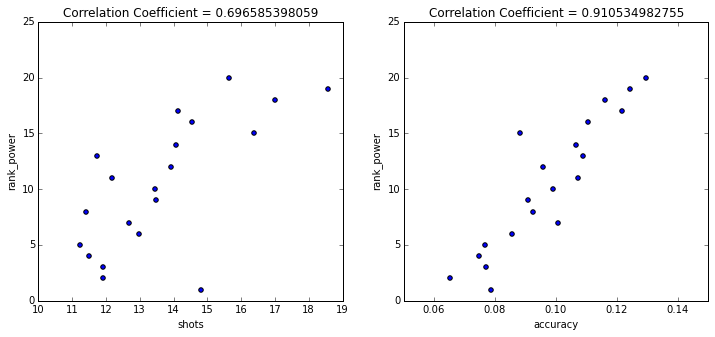

In [129]:
# HYPOTHESIS
# the more shots on target the team gets, the higher rank that team gets
sect = epl[epl.Season == '2015']
sot = pd.DataFrame()
acc = pd.DataFrame()

fig, axes = plt.subplots(nrows=1,ncols=2)


# CALCULATING CORRELATION BETWEEN SHOTS AND RANK_POWER
place = 1
while place < 21:
    # rank_power is the inverse of rank. the higher the team's standings, the higher the power
    sot.loc[place, "rank_power"] = 21 - place 
    sot.loc[place, "shots"] = float(sect[sect.HomeRank == place].HS.sum() + sect[sect.AwayRank == place].AS.sum())/36
    place += 1
    
cor_sot = sot['shots'].corr(sot['rank_power'])
sot.plot(kind='scatter', x='shots', y='rank_power', ax=axes[0], figsize=(12, 5), title="Correlation Coefficient = " + str(cor_sot))
    
# CALCULATING CORRELATION BETWEEN ACCURACY AND RANK_POWER
p = 1
while p < 21:
    acc.loc[p, "rank_power"] = 21 - p
    sum_goal = float(sect[sect.HomeRank == p].FTHG.sum() + sect[sect.AwayRank == p].FTAG.sum())
    sum_shot = float(sect[sect.HomeRank == p].HS.sum() + sect[sect.AwayRank == p].AS.sum())
    acc.loc[p, "accuracy"] = sum_goal/sum_shot
    p += 1

cor_acc = acc['accuracy'].corr(acc['rank_power'])
acc.plot(kind='scatter', x='accuracy', y='rank_power', ax=axes[1], figsize=(12, 5), title="Correlation Coefficient = " + str(cor_acc))


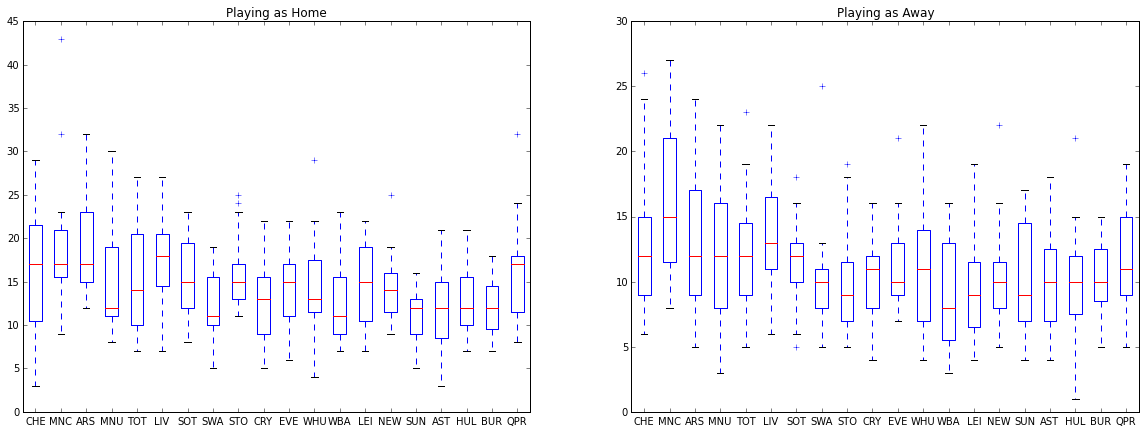

In [130]:
# BOXPLOT 

# option: create a section if we want results from 1 season only
sect  = epl[epl.Season == '2015']
home_shot = pd.DataFrame()
away_shot = pd.DataFrame()

fig, axes = plt.subplots(nrows=1,ncols=2)

# start the loop from placing 1-20, get the goals scored per match by sum of goals divide 36 (total matches played)
place = 1
while place < 21:
    g_count = 1
    for game in sect[sect.HomeRank == place].HS:
        home_shot.loc[sfn[place], "g"+str(g_count)] = game
        g_count += 1
    place += 1
    
home_shot.transpose().plot(kind='box', ax=axes[0], figsize=(20,7), title="Playing as Home")

place = 1
while place < 21:
    g_count = 1
    for game in sect[sect.AwayRank == place].AS:
        away_shot.loc[sfn[place], "g"+str(g_count)] = game
        g_count += 1
    place += 1

away_shot.transpose().plot(kind='box', ax=axes[1], figsize=(20,7), title="Playing as Away")